# Multimodal Classification for Player Position Prediction based on Fifa17 Dataset.

#### Resources and References:

An Example on how to build Multimodal Architecture: https://pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/?utm_source=chatgpt.com

An Example on how to build MLP Architecture:
https://github.com/samyak24jain/fifa-player-position-prediction/blob/main/fifadataset/players_19.csv



In [ ]:
# Set random seed to ensure reproducible results
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
from tensorflow import keras
from tensorflow.keras import layers
from prettytable import PrettyTable


In [ ]:
fifa17 = pd.read_excel("/content/Player_position.xlsx")

In [ ]:
fifa17.shape

(317, 53)

In [ ]:
print('All column names:\n')
print(list(fifa17.columns))

All column names:

['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club', 'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes']


In [ ]:
fifa17.head(10)

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,2009-07-01,2021.0,94,185 cm,80 kg,Right,1985-02-05,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,2004-07-01,2018.0,93,170 cm,72 kg,Left,1987-06-24,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,2013-07-01,2021.0,92,174 cm,68 kg,Right,1992-02-05,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,2011-07-01,2021.0,92,193 cm,92 kg,Right,1986-03-27,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89
4,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,2011-07-01,2019.0,90,193 cm,82 kg,Right,1990-11-07,26,GK,Medium / Medium,3,1,31,13,13,13,21,38,88,12,30,68,60,17,31,32,56,56,25,64,43,57,67,21,31,13,12,21,19,40,13,86,88,87,85,90
5,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,2014-07-01,2021.0,90,185 cm,79 kg,Right,1988-08-21,28,ST,High / Medium,4,3,87,85,25,19,42,80,88,89,39,78,87,62,83,65,79,82,79,84,79,78,84,85,86,91,82,77,76,81,86,8,15,12,6,10
6,Gareth Bale,Wales,RS,11.0,Real Madrid,RW,11.0,2013-09-02,2022.0,90,183 cm,74 kg,Left,1989-07-16,27,RW,High / Medium,3,4,88,89,51,52,55,65,87,86,59,79,85,87,86,80,93,95,78,80,65,77,85,86,91,87,90,86,85,76,76,5,15,11,15,6
7,Thibaut Courtois,Belgium,GK,1.0,Chelsea,GK,13.0,2011-07-26,2019.0,89,199 cm,91 kg,Left,1992-05-11,24,GK,Medium / Medium,3,1,23,13,11,16,18,23,81,13,15,44,52,14,32,31,46,52,38,70,45,61,68,13,36,14,17,19,11,27,12,86,84,69,91,89
8,Eden Hazard,Belgium,LF,10.0,Chelsea,LW,10.0,2012-07-01,2020.0,89,173 cm,74 kg,Right,1991-01-07,26,LW/LM,High / Medium,4,4,91,93,25,22,27,54,85,85,41,86,86,80,84,80,93,87,77,65,90,92,59,57,79,81,82,82,79,86,79,8,11,6,12,8
9,Thiago Silva,Brazil,Sub,14.0,PSG,LCB,2.0,2012-07-01,2020.0,89,183 cm,79 kg,Right,1984-09-22,32,CB,High / High,3,3,80,68,90,89,91,77,84,59,91,74,80,60,79,81,72,76,74,81,68,75,93,82,78,38,71,61,73,71,63,9,9,5,12,10


In [ ]:
remove_columns = ['National_Kit', 'Club_Kit','Club_Joining', 'Contract_Expiry','Birth_Date']
fifa_19 = fifa17.drop(remove_columns, axis=1)

In [ ]:
fifa_19.shape

(317, 48)

In [ ]:
# Find columnwise percentage of missing values

total_records = len(fifa_19)
i = 0
col_missing = {}

for col in list(fifa_19.columns):
    missing_values = fifa_19[col].isnull().sum()
    if missing_values > 0:
        col_missing[col] = round((missing_values/total_records) * 100, 2)

print(f'Columnwise percentage of missing values:')
for col, perc in sorted(col_missing.items(), key=lambda item : item[1], reverse=True):
    i = i + 1
    print(f'{i}){col} : {perc}%')

Columnwise percentage of missing values:
1)National_Position : 48.58%


In [ ]:
remove_columns = ['National_Position']
fifa_17 = fifa_19.drop(remove_columns, axis=1)

In [ ]:
fifa_17['Preffered_Foot'] = fifa_17['Preffered_Foot'].map({'Right': 0, 'Left': 1})


In [ ]:
unique_values_list = fifa_17['Club_Position'].unique().tolist()
print(unique_values_list)
len(unique_values_list)


['LW', 'RW', 'GK', 'ST', 'LCB', 'LCM', 'RS', 'RCM', 'RB', 'RCB', 'LM', 'LDM', 'RM', 'CAM', 'LB', 'CDM', 'RDM', 'LF', 'Sub', 'CB', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM']


26

In [ ]:
import pandas as pd

unique_values_list = ['LW', 'RW', 'GK', 'ST', 'LCB', 'LCM', 'RS', 'RCM', 'RB', 'RCB', 'LM', 'LDM', 'RM', 'CAM', 'LB', 'CDM', 'RDM', 'LF', 'Sub', 'CB', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM']


# Create a mapping from position to integer class
position_to_class = {pos: idx for idx, pos in enumerate(unique_values_list)}

print("Position to class mapping:")
print(position_to_class)


Position to class mapping:
{'LW': 0, 'RW': 1, 'GK': 2, 'ST': 3, 'LCB': 4, 'LCM': 5, 'RS': 6, 'RCM': 7, 'RB': 8, 'RCB': 9, 'LM': 10, 'LDM': 11, 'RM': 12, 'CAM': 13, 'LB': 14, 'CDM': 15, 'RDM': 16, 'LF': 17, 'Sub': 18, 'CB': 19, 'Res': 20, 'CM': 21, 'LS': 22, 'RF': 23, 'RWB': 24, 'RAM': 25}


In [ ]:
fifa_17['Position_Class'] = fifa_17['Club_Position'].map(position_to_class)

In [ ]:
fifa_17.head(10)

,Name,Nationality,Club,Club_Position,Rating,Height,Weight,Preffered_Foot,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,Position_Class
0,Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185 cm,80 kg,0,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11,0
1,Lionel Messi,Argentina,FC Barcelona,RW,93,170 cm,72 kg,1,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8,1
2,Neymar,Brazil,FC Barcelona,LW,92,174 cm,68 kg,0,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11,0
3,Manuel Neuer,Germany,FC Bayern,GK,92,193 cm,92 kg,0,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89,2
4,De Gea,Spain,Manchester Utd,GK,90,193 cm,82 kg,0,26,GK,Medium / Medium,3,1,31,13,13,13,21,38,88,12,30,68,60,17,31,32,56,56,25,64,43,57,67,21,31,13,12,21,19,40,13,86,88,87,85,90,2
5,Robert Lewandowski,Poland,FC Bayern,ST,90,185 cm,79 kg,0,28,ST,High / Medium,4,3,87,85,25,19,42,80,88,89,39,78,87,62,83,65,79,82,79,84,79,78,84,85,86,91,82,77,76,81,86,8,15,12,6,10,3
6,Gareth Bale,Wales,Real Madrid,RW,90,183 cm,74 kg,1,27,RW,High / Medium,3,4,88,89,51,52,55,65,87,86,59,79,85,87,86,80,93,95,78,80,65,77,85,86,91,87,90,86,85,76,76,5,15,11,15,6,1
7,Thibaut Courtois,Belgium,Chelsea,GK,89,199 cm,91 kg,1,24,GK,Medium / Medium,3,1,23,13,11,16,18,23,81,13,15,44,52,14,32,31,46,52,38,70,45,61,68,13,36,14,17,19,11,27,12,86,84,69,91,89,2
8,Eden Hazard,Belgium,Chelsea,LW,89,173 cm,74 kg,0,26,LW/LM,High / Medium,4,4,91,93,25,22,27,54,85,85,41,86,86,80,84,80,93,87,77,65,90,92,59,57,79,81,82,82,79,86,79,8,11,6,12,8,0
9,Thiago Silva,Brazil,PSG,LCB,89,183 cm,79 kg,0,32,CB,High / High,3,3,80,68,90,89,91,77,84,59,91,74,80,60,79,81,72,76,74,81,68,75,93,82,78,38,71,61,73,71,63,9,9,5,12,10,4


In [ ]:
fifa_17.shape

(317, 48)

In [ ]:
new_work_rate_17 = fifa_17['Work_Rate'].str.get_dummies().add_prefix('work_rate_')
new_work_rate_17.head(10)

,work_rate_High / High,work_rate_High / Low,work_rate_High / Medium,work_rate_Low / High,work_rate_Low / Low,work_rate_Low / Medium,work_rate_Medium / High,work_rate_Medium / Low,work_rate_Medium / Medium
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1
8,0,0,1,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0


In [ ]:
fifa_17 = pd.concat([fifa_17, new_work_rate_17], axis = 1)

In [ ]:
fifa_17 = fifa_17.drop(['Work_Rate'], axis=1)

In [ ]:
fifa_17.head(10)

,Name,Nationality,Club,Club_Position,Rating,Height,Weight,Preffered_Foot,Age,Preffered_Position,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,Position_Class,work_rate_High / High,work_rate_High / Low,work_rate_High / Medium,work_rate_Low / High,work_rate_Low / Low,work_rate_Low / Medium,work_rate_Medium / High,work_rate_Medium / Low,work_rate_Medium / Medium
0,Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185 cm,80 kg,0,32,LW/ST,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11,0,0,1,0,0,0,0,0,0,0
1,Lionel Messi,Argentina,FC Barcelona,RW,93,170 cm,72 kg,1,29,RW,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8,1,0,0,0,0,0,0,0,0,1
2,Neymar,Brazil,FC Barcelona,LW,92,174 cm,68 kg,0,25,LW,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11,0,0,0,1,0,0,0,0,0,0
3,Manuel Neuer,Germany,FC Bayern,GK,92,193 cm,92 kg,0,31,GK,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89,2,0,0,0,0,0,0,0,0,1
4,De Gea,Spain,Manchester Utd,GK,90,193 cm,82 kg,0,26,GK,3,1,31,13,13,13,21,38,88,12,30,68,60,17,31,32,56,56,25,64,43,57,67,21,31,13,12,21,19,40,13,86,88,87,85,90,2,0,0,0,0,0,0,0,0,1
5,Robert Lewandowski,Poland,FC Bayern,ST,90,185 cm,79 kg,0,28,ST,4,3,87,85,25,19,42,80,88,89,39,78,87,62,83,65,79,82,79,84,79,78,84,85,86,91,82,77,76,81,86,8,15,12,6,10,3,0,0,1,0,0,0,0,0,0
6,Gareth Bale,Wales,Real Madrid,RW,90,183 cm,74 kg,1,27,RW,3,4,88,89,51,52,55,65,87,86,59,79,85,87,86,80,93,95,78,80,65,77,85,86,91,87,90,86,85,76,76,5,15,11,15,6,1,0,0,1,0,0,0,0,0,0
7,Thibaut Courtois,Belgium,Chelsea,GK,89,199 cm,91 kg,1,24,GK,3,1,23,13,11,16,18,23,81,13,15,44,52,14,32,31,46,52,38,70,45,61,68,13,36,14,17,19,11,27,12,86,84,69,91,89,2,0,0,0,0,0,0,0,0,1
8,Eden Hazard,Belgium,Chelsea,LW,89,173 cm,74 kg,0,26,LW/LM,4,4,91,93,25,22,27,54,85,85,41,86,86,80,84,80,93,87,77,65,90,92,59,57,79,81,82,82,79,86,79,8,11,6,12,8,0,0,0,1,0,0,0,0,0,0
9,Thiago Silva,Brazil,PSG,LCB,89,183 cm,79 kg,0,32,CB,3,3,80,68,90,89,91,77,84,59,91,74,80,60,79,81,72,76,74,81,68,75,93,82,78,38,71,61,73,71,63,9,9,5,12,10,4,1,0,0,0,0,0,0,0,0


In [ ]:
# Rename the columns
fifa_17.rename(columns={'Height': 'Height_cm', 'Weight': 'Weight_kg'}, inplace=True)

# Remove the suffixes and convert to numeric types
fifa_17['Height_cm'] = fifa_17['Height_cm'].str.replace(' cm', '', regex=False).astype(int)
fifa_17['Weight_kg'] = fifa_17['Weight_kg'].str.replace(' kg', '', regex=False).astype(int)

fifa_17.head()

,Name,Nationality,Club,Club_Position,Rating,Height_cm,Weight_kg,Preffered_Foot,Age,Preffered_Position,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,Position_Class,work_rate_High / High,work_rate_High / Low,work_rate_High / Medium,work_rate_Low / High,work_rate_Low / Low,work_rate_Low / Medium,work_rate_Medium / High,work_rate_Medium / Low,work_rate_Medium / Medium
0,Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185,80,0,32,LW/ST,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11,0,0,1,0,0,0,0,0,0,0
1,Lionel Messi,Argentina,FC Barcelona,RW,93,170,72,1,29,RW,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8,1,0,0,0,0,0,0,0,0,1
2,Neymar,Brazil,FC Barcelona,LW,92,174,68,0,25,LW,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11,0,0,0,1,0,0,0,0,0,0
3,Manuel Neuer,Germany,FC Bayern,GK,92,193,92,0,31,GK,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89,2,0,0,0,0,0,0,0,0,1
4,De Gea,Spain,Manchester Utd,GK,90,193,82,0,26,GK,3,1,31,13,13,13,21,38,88,12,30,68,60,17,31,32,56,56,25,64,43,57,67,21,31,13,12,21,19,40,13,86,88,87,85,90,2,0,0,0,0,0,0,0,0,1


In [ ]:
print('Missing values in FIFA 19 dataset: ' + str(fifa_17.isna().sum().sum()))

Missing values in FIFA 19 dataset: 0


In [ ]:
print(fifa_17.head(5))

                Name Nationality            Club Club_Position  Rating  \
0  Cristiano Ronaldo    Portugal     Real Madrid            LW      94   
1       Lionel Messi   Argentina    FC Barcelona            RW      93   
2             Neymar      Brazil    FC Barcelona            LW      92   
3       Manuel Neuer     Germany       FC Bayern            GK      92   
4             De Gea       Spain  Manchester Utd            GK      90   

   Height_cm  Weight_kg  Preffered_Foot  Age Preffered_Position  Weak_foot  \
0        185         80               0   32              LW/ST          4   
1        170         72               1   29                 RW          4   
2        174         68               0   25                 LW          5   
3        193         92               0   31                 GK          4   
4        193         82               0   26                 GK          3   

   Skill_Moves  Ball_Control  Dribbling  Marking  Sliding_Tackle  \
0            5    

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fifa_17.dtypes)

Name                         object
Nationality                  object
Club                         object
Club_Position                object
Rating                        int64
Height_cm                     int64
Weight_kg                     int64
Preffered_Foot                int64
Age                           int64
Preffered_Position           object
Weak_foot                     int64
Skill_Moves                   int64
Ball_Control                  int64
Dribbling                     int64
Marking                       int64
Sliding_Tackle                int64
Standing_Tackle               int64
Aggression                    int64
Reactions                     int64
Attacking_Position            int64
Interceptions                 int64
Vision                        int64
Composure                     int64
Crossing                      int64
Short_Pass                    int64
Long_Pass                     int64
Acceleration                  int64
Speed                       

In [ ]:
remove_features = ['Name','Nationality','Club','Club_Position','Preffered_Position']

In [ ]:
# Calculate number of unique values per feature
for feature in remove_features:
    print(f'Unique values in {feature} = {len(fifa_19[feature].unique())}')

Unique values in Name = 317
Unique values in Nationality = 43
Unique values in Club = 84
Unique values in Club_Position = 26
Unique values in Preffered_Position = 69


In [ ]:
response_variables = 'Position_Class'
print(len(np.unique(fifa_17[response_variables])))
print(np.unique(fifa_17[response_variables]))
print(fifa_17[response_variables].value_counts())
print(fifa_17[response_variables])

26
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Position_Class
18    76
2     30
9     22
3     22
4     20
12    13
5     12
0     12
1     11
8     11
20    10
7     10
14    10
15     9
10     9
6      6
13     5
11     5
19     5
16     5
22     5
21     3
17     2
23     2
24     1
25     1
Name: count, dtype: int64
0       0
1       1
2       0
3       2
4       2
       ..
312    18
313    18
314    20
315    20
316     4
Name: Position_Class, Length: 317, dtype: int64


In [ ]:
predictors = [feature for feature in fifa_17 if feature not in remove_features and feature not in response_variables]
fifa_17[predictors].head()

,Rating,Height_cm,Weight_kg,Preffered_Foot,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,work_rate_High / High,work_rate_High / Low,work_rate_High / Medium,work_rate_Low / High,work_rate_Low / Low,work_rate_Low / Medium,work_rate_Medium / High,work_rate_Medium / Low,work_rate_Medium / Medium
0,94,185,80,0,32,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11,0,1,0,0,0,0,0,0,0
1,93,170,72,1,29,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8,0,0,0,0,0,0,0,0,1
2,92,174,68,0,25,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11,0,0,1,0,0,0,0,0,0
3,92,193,92,0,31,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89,0,0,0,0,0,0,0,0,1
4,90,193,82,0,26,3,1,31,13,13,13,21,38,88,12,30,68,60,17,31,32,56,56,25,64,43,57,67,21,31,13,12,21,19,40,13,86,88,87,85,90,0,0,0,0,0,0,0,0,1


In [ ]:
print(f'Total number of predictors/features = {len(predictors)}')
print(f'Total number of response/target variables = {len(fifa_17[response_variables])}')

Total number of predictors/features = 50
Total number of response/target variables = 317


In [ ]:
fifa_17_filtered = fifa_17[fifa_17[response_variables].map(fifa_17[response_variables].value_counts()) > 1]
fifa_17_train, fifa_17_val = train_test_split(
    fifa_17_filtered, train_size=0.75, random_state=42, stratify=fifa_17_filtered[response_variables]
)

In [ ]:
# Original unique classes
original_classes = set(fifa_17[response_variables].unique())

# Filtered unique classes
filtered_classes = set(fifa_17_filtered[response_variables].unique())

# Classes that were removed
removed_classes = original_classes - filtered_classes

print("Classes removed:", removed_classes)


Classes removed: {24, 25}


In [ ]:
X_train = fifa_17_train[predictors]
X_val = fifa_17_val[predictors]

y_train = fifa_17_train[response_variables]
y_val = fifa_17_val[response_variables]

print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'X_val.shape = {X_val.shape}')
print(f'y_val.shape = {y_val.shape}')

X_train.shape = (236, 50)
y_train.shape = (236,)
X_val.shape = (79, 50)
y_val.shape = (79,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)

In [ ]:
input_shape = X_train.shape[1]

num_classes = len(np.unique(y_train))
output_shape = num_classes


print('Input shape = ', input_shape)
print('Output shape = ', output_shape)

Input shape =  50
Output shape =  24


In [ ]:
# Define the numerical branch
def build_numerical_branch(input_dim, output_classes):
    inputs = keras.Input(shape=(input_dim,))

    # First hidden layer
    x = layers.Dense(2048, activation="relu")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.2)(x)

    # Second hidden layer
    x = layers.Dense(1536, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.2)(x)

    # Third hidden layer
    x = layers.Dense(1024, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.2)(x)

    # Fourth hidden layer
    x = layers.Dense(512, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.2)(x)

    # Fifth hidden layer
    x = layers.Dense(256, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.2)(x)

    outputs = layers.Dense(output_classes, activation="softmax", name="output_layer")(x)

    # Define the Model
    numerical_branch = keras.Model(inputs=inputs, outputs=outputs, name="numerical_branch")
    return numerical_branch

In [ ]:
model_dropout = build_numerical_branch(input_shape,output_shape)

# Compile the model
model_dropout.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Train the model
history_dropout = model_dropout.fit(
    X_train_std, y_train,
    batch_size=256,
    epochs=575,
    validation_data=(X_val_std, y_val),
    verbose=1
)

Epoch 1/575
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.0551 - loss: 4.0930 - val_accuracy: 0.3165 - val_loss: 3.1336
Epoch 2/575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2966 - loss: 2.7366 - val_accuracy: 0.3291 - val_loss: 3.1151
Epoch 3/575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3390 - loss: 2.3820 - val_accuracy: 0.3418 - val_loss: 3.1044
Epoch 4/575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4195 - loss: 2.1007 - val_accuracy: 0.2911 - val_loss: 3.0999
Epoch 5/575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4025 - loss: 2.1098 - val_accuracy: 0.1899 - val_loss: 3.0979
Epoch 6/575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5085 - loss: 1.7204 - val_accuracy: 0.1772 - val_loss: 3.0956
Epoch 7/575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5636 - loss: 1.5924 - val_accuracy: 0.1899 - val_loss: 3.0947
Epoch 8/575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5975 - loss: 1.4784 - val_accuracy: 0.1772 - val_loss:

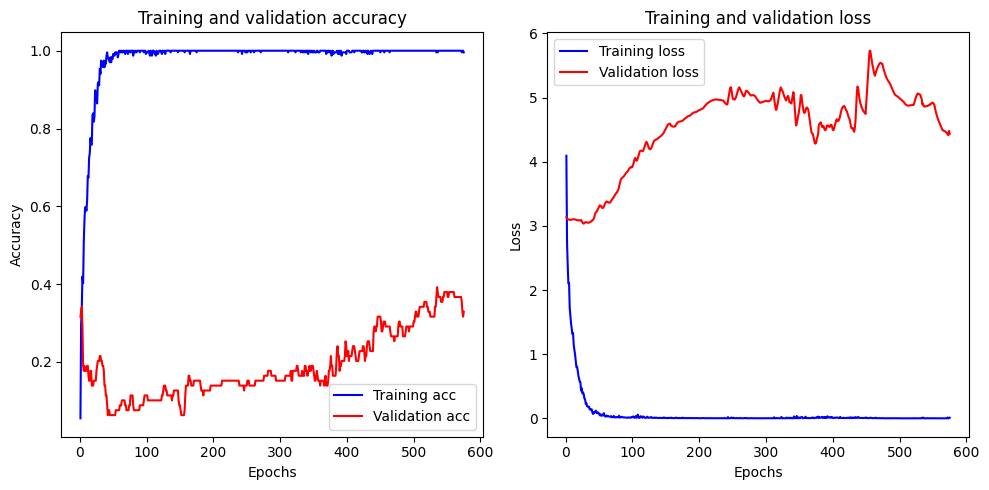

In [ ]:
import matplotlib.pyplot as plt

# Getting train and validation accuracies
train_acc_dropout = history_dropout.history['accuracy']
val_acc_dropout = history_dropout.history['val_accuracy']

# Getting train and validation losses
train_loss_dropout = history_dropout.history['loss']
val_loss_dropout = history_dropout.history['val_loss']
epochs = range(1, len(train_loss_dropout) + 1)

# Plotting the training and validation accuracies
plt.figure(figsize=(10, 5))  # Adjust size for better visibility
plt.subplot(1, 2, 1)  # Subplot for accuracy
plt.plot(epochs, train_acc_dropout, 'b', label='Training acc')
plt.plot(epochs, val_acc_dropout, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation losses
plt.subplot(1, 2, 2)  # Subplot for loss
plt.plot(epochs, train_loss_dropout, 'b', label='Training loss')
plt.plot(epochs, val_loss_dropout, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/PLS2.zip", 'r')
zip_ref.extractall()

In [ ]:
import os
import shutil
import numpy as np

# Directory containing the sorted images by position
input_dir = '/content/PLS2'
base_dir = '/content/Players_split'  # The new base directory for train/val/test splits

# If base_dir exists, remove it
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

# Create train/validation/test directories
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Define the split ratios
train_ratio = 0.7
val_ratio = 0.3
#test_ratio = 0.15

# Get a list of all the position directories
positions = [d for d in os.listdir(input_dir)
             if os.path.isdir(os.path.join(input_dir, d))]

# Create corresponding subfolders in train/validation/test for each position
for pos in positions:
    os.mkdir(os.path.join(train_dir, pos))
    os.mkdir(os.path.join(val_dir, pos))
    os.mkdir(os.path.join(test_dir, pos))

# split the images for each position folder
for pos in positions:
    pos_dir = os.path.join(input_dir, pos)
    image_files = [f for f in os.listdir(pos_dir) if f.lower().endswith(('.png'))]

    # Shuffle the files to avoid any ordering bias
    np.random.shuffle(image_files)

    # Compute split indices
    total = len(image_files)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)

    train_files = image_files[:train_end]
    val_files = image_files[train_end:]
    #test_files = image_files[val_end:]

    # Copy files to train directory
    for fname in train_files:
        src = os.path.join(pos_dir, fname)
        dst = os.path.join(train_dir, pos, fname)
        shutil.copyfile(src, dst)

    # Copy files to validation directory
    for fname in val_files:
        src = os.path.join(pos_dir, fname)
        dst = os.path.join(val_dir, pos, fname)
        shutil.copyfile(src, dst)

    # Copy files to test directory
    #for fname in test_files:
     #   src = os.path.join(pos_dir, fname)
      #  dst = os.path.join(test_dir, pos, fname)
       # shutil.copyfile(src, dst)


Training images count: 212
Validation images count: 103
Test images count: 0
Total: 315


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(160, 160),  # Match FaceNet expected input
    batch_size=8,
    shuffle=True
)

validation_dataset = image_dataset_from_directory(
    val_dir,
    image_size=(160, 160),
    batch_size=8,
    shuffle=True
)

#test_dataset = image_dataset_from_directory(
 #   test_dir,
  #  image_size=(160, 160),
   # batch_size=32,
    #shuffle=False



Found 212 files belonging to 24 classes.
Found 103 files belonging to 24 classes.


In [ ]:
!pip install keras_facenet
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from keras_facenet import FaceNet
import numpy as np

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.8 MB/s eta 0:00:00
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=ae42771fea2fdd470c20d91020594b7caf971f57f8e11b00c739318745101f82
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras_facenet


In [ ]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

def data_augmentation(x):
    x = RandomFlip("horizontal")(x)
    x = RandomRotation(0.1)(x)
    x = RandomZoom(0.2)(x)
    return x

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from keras_facenet import FaceNet
from tensorflow import keras

In [ ]:
def build_pretrained_facenet(input_shape=(160,160,3)):
    # Load the FaceNet model
    facenet = FaceNet()
    facenet_model = facenet.model

    # Freeze the FaceNet model’s layers
    facenet_model.trainable = False

    # Define the input
    inputs = keras.Input(shape=input_shape)

    # Apply data augmentation
    x = data_augmentation(inputs)


    x = layers.Rescaling(1./255)(x)


    x = facenet_model(x)


    x = layers.Dense(256, activation="relu")(x)
    x=layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(24, activation="softmax")(x)

    # Create the final model
    model = keras.Model(inputs, outputs)
    return model


In [ ]:
def build_multimodal_network(num_input_dim, num_classes):
    image_branch = build_pretrained_facenet()
    numerical_branch = build_numerical_branch(num_input_dim, num_classes)

    # Inputs
    image_input = tf.keras.Input(shape=(160, 160, 3), name="image_input")
    numerical_input = tf.keras.Input(shape=(num_input_dim,), name="numerical_input")

    # Extract features
    image_features = image_branch(image_input)
    numerical_features = numerical_branch(numerical_input)

    # Concatenate features
    combined_features = layers.Concatenate()([image_features, numerical_features])
    x = layers.Dense(256, activation="relu")(combined_features)
    x = layers.Dropout(0.3)(x)
    output = layers.Dense(num_classes, activation="softmax")(x)

    return Model(inputs=[image_input, numerical_input], outputs=output)

In [ ]:
def create_multimodal_dataset(image_dataset, numerical_data, labels, batch_size=32):
    # Convert numerical data and labels into tensors
    numerical_data = tf.convert_to_tensor(numerical_data, dtype=tf.float32)
    labels = tf.convert_to_tensor(labels, dtype=tf.int32)

    # Create a dataset from numerical data and labels
    numerical_dataset = tf.data.Dataset.from_tensor_slices(numerical_data)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    image_dataset = image_dataset.unbatch().map(lambda x, _: x)

    # Combine image, numerical, and label datasets
    combined_dataset = tf.data.Dataset.zip((
        {"image_input": image_dataset,
         "numerical_input": numerical_dataset},
        label_dataset
    ))

    # Batch the combined dataset
    combined_dataset = combined_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return combined_dataset

In [ ]:
# Create the multimodal datasets
train_multimodal_dataset = create_multimodal_dataset(train_dataset, X_train_std, y_train)
val_multimodal_dataset = create_multimodal_dataset(validation_dataset, X_val_std, y_val)

In [ ]:
model = build_multimodal_network(num_input_dim=input_shape, num_classes=num_classes)
model.compile(keras.optimizers.Adam(0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numerical_input           │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_29             │ (None, 24)             │     23,635,944 │ image_input[0][0]      │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numerical_branch          │ (None, 24)             │      5,509,400 │ numerical_input[0][0]  │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_14            │ (None, 48)             │              0 │ functional_29[0][0],   │
│ (Concatenate)             │                        │                │ numerical_branch[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_145 (Dense)         │ (None, 256)            │         12,544 │ concatenate_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_115 (Dropout)     │ (None, 256)            │              0 │ dense_145[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_146 (Dense)         │ (None, 24)             │          6,168 │ dropout_115[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 29,164,056 (111.25 MB)

 Trainable params: 5,655,368 (21.57 MB)

 Non-trainable params: 23,508,688 (89.68 MB)

In [ ]:
# Train the model
history = model.fit(
    train_multimodal_dataset,
    validation_data=val_multimodal_dataset,
    epochs=150
)

Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3392 - loss: 1.9230 - val_accuracy: 0.3544 - val_loss: 2.3695
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3263 - loss: 1.8720 - val_accuracy: 0.3671 - val_loss: 2.3307
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3487 - loss: 1.8622 - val_accuracy: 0.3924 - val_loss: 2.3339
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3413 - loss: 1.8674 - val_accuracy: 0.3924 - val_loss: 2.3753
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3240 - loss: 1.8046 - val_accuracy: 0.3418 - val_loss: 2.5233
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3435 - loss: 1.9031 - val_accuracy: 0.3797 - val_loss: 2.3927
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3513 - loss: 1.8190 - val_accuracy: 0.3797 - val_loss: 2.4164
Epoch 8/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3420 - loss: 1.8307 - val_accuracy: 0.3165 - val_loss: